In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
torch.manual_seed(1)
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
t_data = [[0],[0],[0],[1],[1],[1]]
x_train=torch.FloatTensor(x_data)
y_train=torch.FloatTensor(t_data)
print(x_train.size())
print(y_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [7]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(2,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))
    
    

In [8]:
model=BinaryClassifier()
optimizer=optim.SGD(model.parameters(), lr=0.1)


In [9]:
nb_epochs=20000
accuracy_list=[]
cost_list=[]


In [10]:
for epoch in range(nb_epochs):
    h=model(x_train)
    cost=F.binary_cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    prediction = h>=torch.FloatTensor([0.5])
    correct_pred = prediction.float()==y_train
    accuracy = correct_pred.sum().item()/len(correct_pred)
    cost_list.append(cost.item())
    accuracy_list.append(accuracy)

    if epoch%100 == 0:
        print('epoch : ',epoch, 'cost : ', cost.item(), 'accuracy : ', accuracy)


epoch :  0 cost :  0.5397130846977234 accuracy :  0.8333333333333334
epoch :  100 cost :  0.4076883792877197 accuracy :  0.8333333333333334
epoch :  200 cost :  0.34564945101737976 accuracy :  0.8333333333333334
epoch :  300 cost :  0.29832255840301514 accuracy :  0.8333333333333334
epoch :  400 cost :  0.26117900013923645 accuracy :  0.8333333333333334
epoch :  500 cost :  0.2316325306892395 accuracy :  1.0
epoch :  600 cost :  0.20777933299541473 accuracy :  1.0
epoch :  700 cost :  0.18822990357875824 accuracy :  1.0
epoch :  800 cost :  0.17197585105895996 accuracy :  1.0
epoch :  900 cost :  0.15828156471252441 accuracy :  1.0
epoch :  1000 cost :  0.1466050148010254 accuracy :  1.0
epoch :  1100 cost :  0.13654100894927979 accuracy :  1.0
epoch :  1200 cost :  0.12778277695178986 accuracy :  1.0
epoch :  1300 cost :  0.12009505182504654 accuracy :  1.0
epoch :  1400 cost :  0.11329448223114014 accuracy :  1.0
epoch :  1500 cost :  0.10723665356636047 accuracy :  1.0
epoch :  1600

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

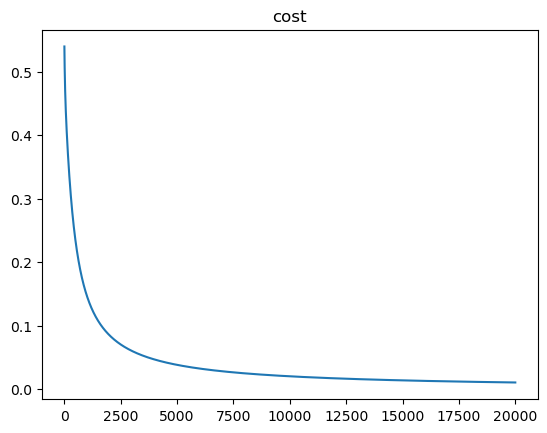

In [12]:
s1= pd.Series(cost_list)
plt.plot(s1)
plt.title("cost")
plt.show()

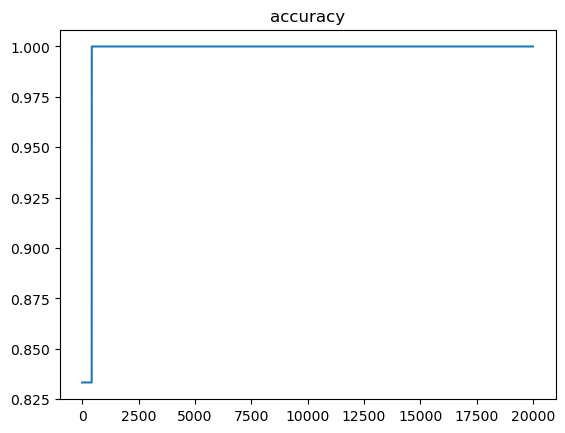

In [13]:
s2=pd.Series(accuracy_list)
plt.plot(s2)
plt.title("accuracy")
plt.show()